<a href="https://colab.research.google.com/github/farshahid04/AHI-Diabetes-Data/blob/main/NOVA_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
x <- 42
print(x)

[1] 42


In [ ]:
%%R -i df
df2 <- df
df$encounter_id


In [4]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Breast Cancer Coimbra Data Set varible

DV = Insulin 

IV Factor I = Glucose

IV Factor II= Age

Quantitative Attributes:
Age (years)

BMI (kg/m2)

Glucose (mg/dL)

Insulin (µU/mL)

HOMA

Leptin (ng/mL)

Adiponectin (µg/mL)

Resistin (ng/mL)

MCP-1(pg/dL)

Labels:
1=Healthy controls

2=Patients



In [5]:
import seaborn as sns

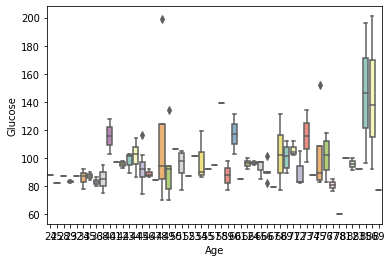

In [6]:
# generate a boxplot to see the data distribution by Glucose and BMI. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Age", y="Glucose", data=df, palette="Set3") 

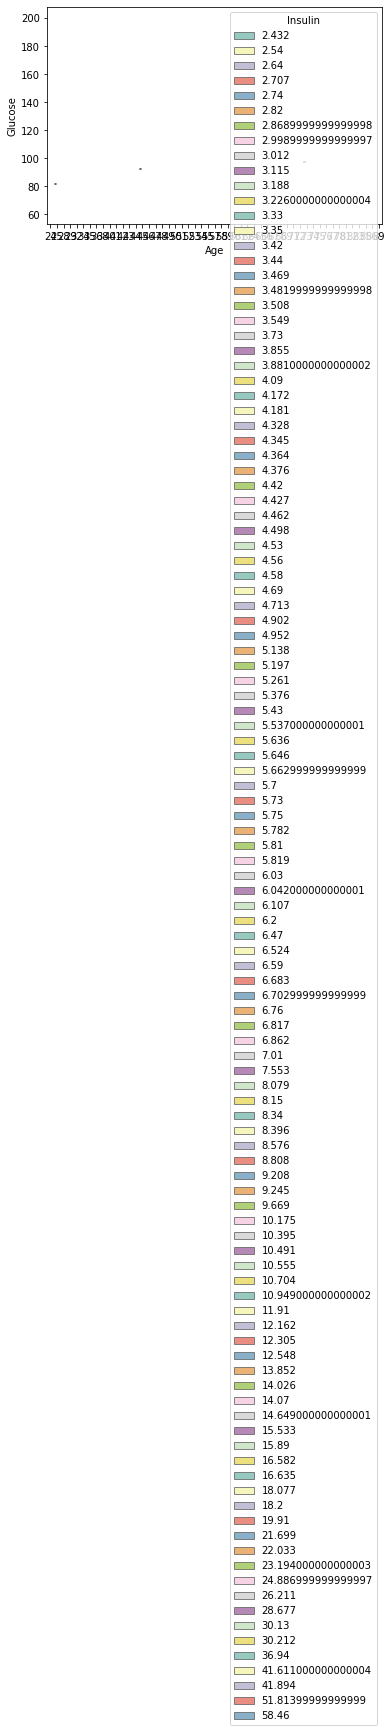

In [7]:
sns.boxplot(x="Age", y="Glucose", hue="Insulin" , data=df, palette="Set3") 


In [8]:
workingdf = df [['Glucose', 'Insulin', 'Age']]

In [9]:
workingdf

,Glucose,Insulin,Age
0,70,2.707,48
1,92,3.115,83
2,91,4.498,82
3,77,3.226,68
4,92,3.549,86
...,...,...,...
111,92,3.330,45
112,100,4.530,62
113,97,5.730,65
114,82,2.820,72


In [10]:
descriptive = workingdf.describe()
descriptive

,Glucose,Insulin,Age
count,116.000000,116.000000,116.000000
mean,97.793103,10.012086,57.301724
std,22.525162,10.067768,16.112766
min,60.000000,2.432000,24.000000
25%,85.750000,4.359250,45.000000
50%,92.000000,5.924500,56.000000
75%,102.000000,11.189250,71.000000
max,201.000000,58.460000,89.000000


In [11]:
Glucose_counts = workingdf['Glucose'].value_counts()

In [12]:
Glucose_counts

92     9
90     6
97     4
77     4
82     4
83     4
85     4
86     4
87     4
103    4
101    4
88     3
84     3
89     3
93     3
94     3
95     3
98     3
100    3
102    3
106    2
112    2
99     2
131    2
78     2
70     2
105    2
134    2
201    1
199    1
60     1
138    1
139    1
75     1
152    1
196    1
74     1
119    1
76     1
79     1
80     1
118    1
91     1
96     1
104    1
108    1
110    1
114    1
116    1
128    1
Name: Glucose, dtype: int64

In [13]:
Age_counts = workingdf['Age'].value_counts()

In [14]:
Age_counts

45    7
49    5
66    5
69    5
48    4
51    4
76    4
75    4
44    4
68    3
46    3
43    3
54    3
86    3
34    3
65    3
71    3
72    3
85    2
82    2
42    2
29    2
40    2
77    2
38    2
36    2
59    2
60    2
35    2
62    2
64    2
73    2
32    1
41    1
28    1
25    1
89    1
57    1
47    1
50    1
52    1
53    1
55    1
58    1
61    1
67    1
74    1
78    1
81    1
83    1
24    1
Name: Age, dtype: int64

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
ols('Insulin ~ C(Age) + C(Glucose)' , data=workingdf).fit()
model = ols('Insulin ~ C(Age) + C(Glucose)', data=workingdf).fit()


In [17]:
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Age),4395.534080,50.0,2.880317,0.005918
C(Glucose),7708.066686,49.0,5.154043,0.000100
Residual,610.423648,20.0,NaN,NaN


In [18]:
!pip install matplotlib-venn

In [ ]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=workingdf, res_var='Insulin', xfac_var='Age' ,
              anova_model='Insulin~C(Age)+C(Glucose)+C(Age):C(Glucose)')
res.tukey_summary

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()


In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

In [ ]:
# if you have  a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=d_melt, res_var='Insulin', xfac_var=['Age', 'Glucose'])
res.levene_summary